# Modelo de Ising general



In [1]:
#=using PyPlot

using PyCall
np = pyimport("numpy")=#
using Plots
using LaTeXStrings
include("Ising general.jl") #Contiene las funciones del modelo de Ising

microEstados_montecarlo (generic function with 1 method)

In [2]:
include("Ising general.jl") #Contiene la función que me genera mi mallado circular
microEstados50 = Configuraciones(50,0.50)
microEstados100 = Configuraciones(100,0.50)
microEstados200 = Configuraciones(200,0.50)

MicroEstados(200, [1, -1, 1, 1, 1, 1, 1, 1, 1, 1  …  1, -1, -1, 1, 1, 1, 1, 1, -1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1 -1 … -1 -1; -1 -1 … 1 -1; … ; 1 -1 … -1 -1; 1 -1 … -1 1], [1 1 … 1 1; 1 1 … 1 1; … ; 1 1 … 1 1; 1 1 … 1 1])

In [3]:
@time begin
    enerC50, magC50 = termalizacion(microEstados50,1.5,100000,"caliente")
    enerF50, magF50 = termalizacion(microEstados50,1.5,100000,"fria")
end

 47.861061 seconds (500.20 M allocations: 44.724 GiB, 13.19% gc time)


([-10000.0, -10000.0, -10000.0, -10000.0, -10000.0, -10000.0, -10000.0, -10000.0, -10000.0, -10000.0  …  -3608.0, -3616.0, -3624.0, -3624.0, -3624.0, -3624.0, -3624.0, -3624.0, -3640.0, -3640.0], [2500.0, 2500.0, 2500.0, 2500.0, 2500.0, 2500.0, 2500.0, 2500.0, 2500.0, 2500.0  …  290.0, 292.0, 294.0, 292.0, 292.0, 292.0, 294.0, 294.0, 292.0, 294.0])

In [4]:
@time begin
    enerC100, magC100 = termalizacion(microEstados100,1.5,100000,"caliente")
    enerF100, magF100 = termalizacion(microEstados100,1.5,100000,"fria")
end

190.673840 seconds (2.00 G allocations: 178.835 GiB, 13.29% gc time)


([-40000.0, -40000.0, -40000.0, -40000.0, -40000.0, -40000.0, -40000.0, -40000.0, -40000.0, -40000.0  …  -18232.0, -18232.0, -18240.0, -18232.0, -18232.0, -18232.0, -18232.0, -18232.0, -18232.0, -18232.0], [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0  …  4078.0, 4076.0, 4078.0, 4076.0, 4078.0, 4078.0, 4078.0, 4080.0, 4080.0, 4080.0])

In [ ]:
@time begin
    enerC200, magC200 = termalizacion(microEstados200,1.5,100000,"caliente")
    enerF200, magF200 = termalizacion(microEstados200,1.5,100000,"fria")
end

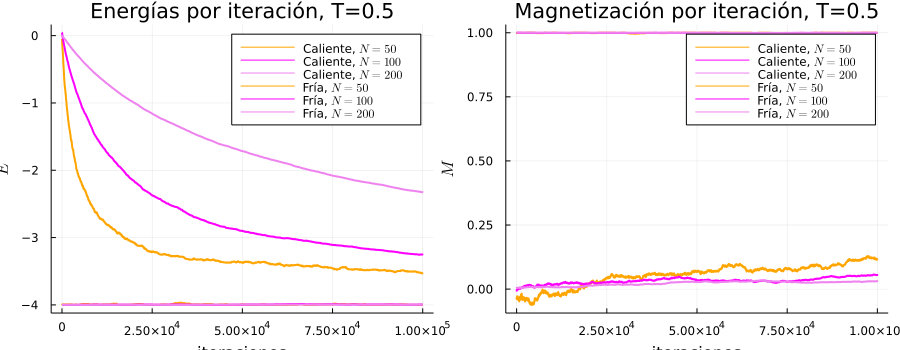

In [19]:
p1 = plot(enerC50/50^2, title = "Energías por iteración, T=1.5",
xlabel = "iteraciones",
ylabel = L"E", label = L"Caliente, $N=50$",w=2, color = "orange")
plot!(enerC100/100^2, label = L"Caliente, $N=100$",w=2, color = "magenta")
plot!(enerC200/200^2, label = L"Caliente, $N=200$",w=2, color = "violet")

plot!(enerF50/50^2,label = L"Fría, $N=50$",w=2, color = "orange")
plot!(enerF100/100^2, label =L"Fría, $N=100$",w=2, color = "magenta")
plot!(enerF200/200^2, label = L"Fría, $N=200$",w=2, color = "violet")
savefig("energiaIteracionC")

p2 = plot(magC50/50^2, title = "Magnetización por iteración, T=1.5",
xlabel = "iteraciones",
ylabel = L"M", label = L"Caliente, $N=50$",w=2, color = "orange")
plot!(magC100/100^2, label = L"Caliente, $N=100$",w=2, color = "magenta")
plot!(magC200/200^2, label = L"Caliente, $N=200$",w=2, color = "violet")

plot!(magF50/50^2,label = L"Fría, $N=50$",w=2, color =  "orange")
plot!(magF100/100^2,label = L"Fría, $N=100$",w=2, color = "magenta")
plot!(magF200/200^2,label = L"Fría, $N=200$",w=2, color = "violet")
savefig("magnIteracionC")


plot(p1,p2, layout=(1, 2), size=(900, 350), fmt=:png)
#savefig("hola")


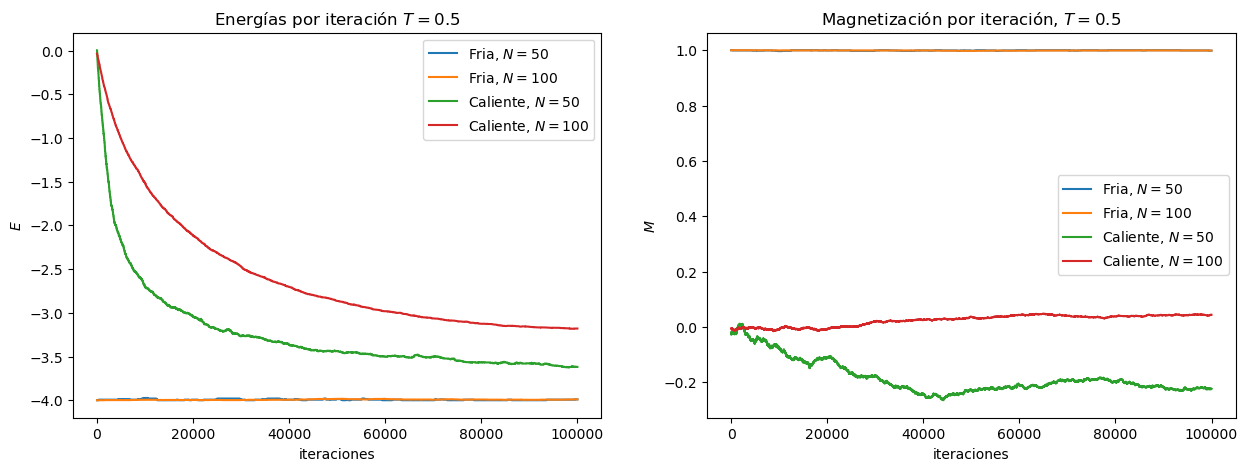

In [35]:
figure(figsize=(15,5))

subplot(1,2,1)

plot(enerF50/50^2,label = L"Fria, $N=50$")
plot(enerF100/100^2,label = L"Fria, $N=100$")

plot(enerC50/50^2,label=L"Caliente, $N=50$")
plot(enerC100/100^2,label=L"Caliente, $N=100$")

#println(energiaTotal(microEstados,"caliente"))
#println(energiaTotal(microEstados,"fria"))
title(L"Energías por iteración $T=0.5$")
xlabel("iteraciones")
ylabel(L"E")

legend()

subplot(1,2,2)

plot(magF50/50^2,label = L"Fria, $N=50$")
plot(magF100/100^2,label = L"Fria, $N=100$")

plot(magC50/50^2,label= L"Caliente, $N=50$")
plot(magC100/100^2,label= L"Caliente, $N=100$")

title(L"Magnetización por iteración, $T=0.5$")
xlabel("iteraciones")
ylabel(L"M")
legend()

savefig("fria.jpg")


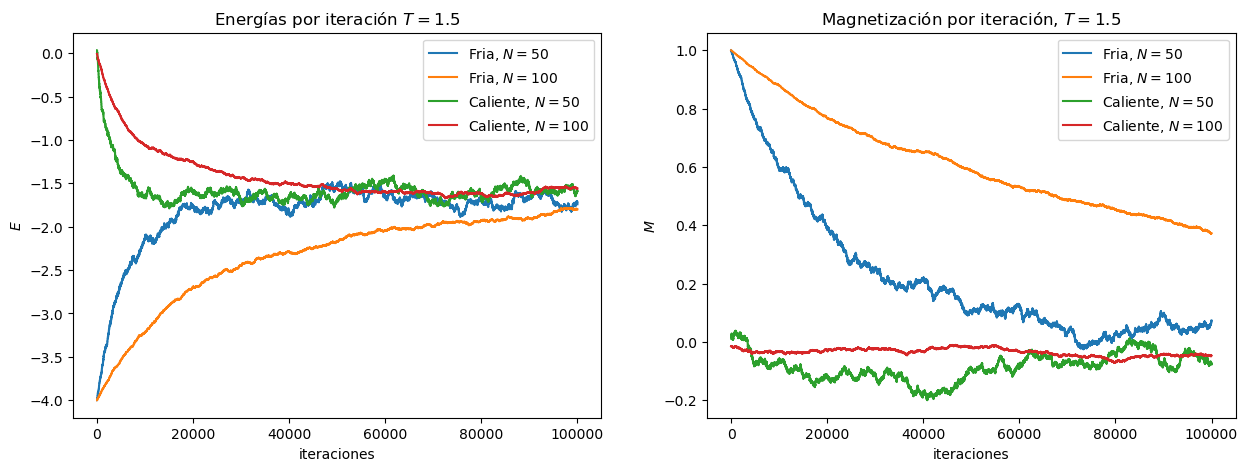

In [34]:
figure(figsize=(15,5))

subplot(1,2,1)
#plot(enerF/10^2,label = L"Fria, $N=10$")
#plot(enerC/10^2,label=L"Caliente, $N=10$")

#plot(enerF20/20^2,label = L"Fria, $N=20$")
plot(enerF50/50^2,label = L"Fria, $N=50$")
plot(enerF100/100^2,label = L"Fria, $N=100$")

#plot(enerC20/20^2,label=L"Caliente, $N=20$")
plot(enerC50/50^2,label=L"Caliente, $N=50$")
plot(enerC100/100^2,label=L"Caliente, $N=100$")

#println(energiaTotal(microEstados,"caliente"))
#println(energiaTotal(microEstados,"fria"))
title(L"Energías por iteración $T=1.5$")
xlabel("iteraciones")
ylabel(L"E")

legend()

subplot(1,2,2)
#plot(magF20/20^2,label = L"Fria, $N=20$")
plot(magF50/50^2,label = L"Fria, $N=50$")
plot(magF100/100^2,label = L"Fria, $N=100$")

#plot(magC20/20^2,label= L"Caliente, $N=20$")
plot(magC50/50^2,label= L"Caliente, $N=50$")
plot(magC100/100^2,label= L"Caliente, $N=100$")

title(L"Magnetización por iteración, $T=1.5$")
xlabel("iteraciones")
ylabel(L"M")
legend()

savefig("caliente.jpg")


## Pruebas con simulacionMontecarlo()

Estas pruebas fallan en tiempo cuando el número de pasos se incrementa. Valdría la pena revisar que onda y arreglarlo para que corra más rápido. Mi hipótesis es que al utilizar dos funciones para resolver Metropolis, esta ocupando más recursos y memoria que en solo una función. Además de que tiene problemas con redes pequeñas...

In [5]:
include("Ising general.jl") #Contiene la función que me genera mi mallado circular
microEstados = Configuraciones(50,0.50)

MicroEstados(50, [-1, 1, -1, 1, -1, 1, 1, -1, -1, 1  …  -1, -1, 1, -1, 1, -1, 1, -1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [-1 1 … 1 -1; -1 -1 … -1 -1; … ; -1 1 … -1 1; 1 -1 … 1 1], [1 1 … 1 1; 1 1 … 1 1; … ; 1 1 … 1 1; 1 1 … 1 1])

In [6]:
println(energiaTotal(microEstados,"caliente"))
println(energiaTotal(microEstados,"fria"))

24.0
-10000.0


In [7]:
#Límite óptimo con 100,000 iteraciones; tiempo: 182.85s con la red de 100×100
@time begin
    enerFria, magFria = simulacionMontecarlo(microEstados,0.1,100000,"fria")
    enerCaliente, magCaliente = simulacionMontecarlo(microEstados,0.1,100000,"caliente")
end


 68.310922 seconds (500.20 M allocations: 44.724 GiB, 2.12% gc time)


([24.0, 24.0, 24.0, 24.0, 16.0, 16.0, 8.0, 0.0, -8.0, -8.0  …  -9168.0, -9168.0, -9168.0, -9168.0, -9168.0, -9168.0, -9168.0, -9168.0, -9168.0, -9168.0], [-48.0, -48.0, -50.0, -48.0, -50.0, -52.0, -54.0, -52.0, -50.0, -50.0  …  -438.0, -438.0, -438.0, -438.0, -438.0, -438.0, -438.0, -438.0, -438.0, -438.0])

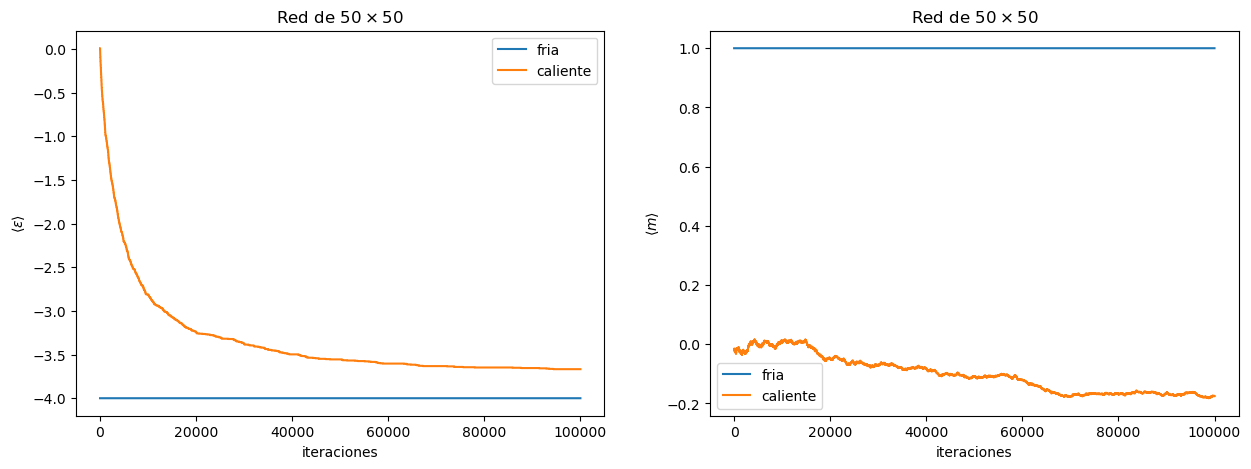

-9168.0
-10000.0


PyObject <matplotlib.legend.Legend object at 0x7f3564c3ec10>

In [8]:
figure(figsize=(15,5))

subplot(1,2,1)
plot(enerFria/50^2,label = "fria")
plot(enerCaliente/50^2,label="caliente")

println(energiaTotal(microEstados,"caliente"))
println(energiaTotal(microEstados,"fria"))
title(L"Red de $50\times50$")
xlabel("iteraciones")
ylabel(L"\langle \varepsilon\rangle")

legend()

subplot(1,2,2)
plot(magFria/50^2,label = "fria")
plot(magCaliente/50^2,label="caliente")

title(L"Red de $50\times50$")
xlabel("iteraciones")
ylabel(L"\langle m\rangle")

legend()

In [9]:
println("Energia final red de 50 fria:     ",energiaTotal(microEstados,"fria"))
println("Energia final red de 50 caliente: ",energiaTotal(microEstados,"caliente"))

Energia final red de 50 fria:     -10000.0
Energia final red de 50 caliente: -9168.0


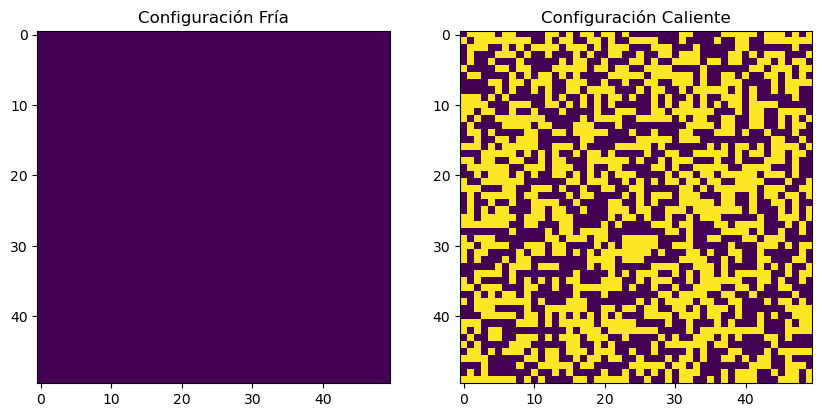

PyObject Text(0.5, 1.0, 'Configuración Caliente')

In [10]:
figure(figsize=(10,6))

subplot(1,2,1)
imshow(microEstados.redFria)
title("Configuración Fría")

subplot(1,2,2)
imshow(microEstados.redCaliente)
title("Configuración Caliente")


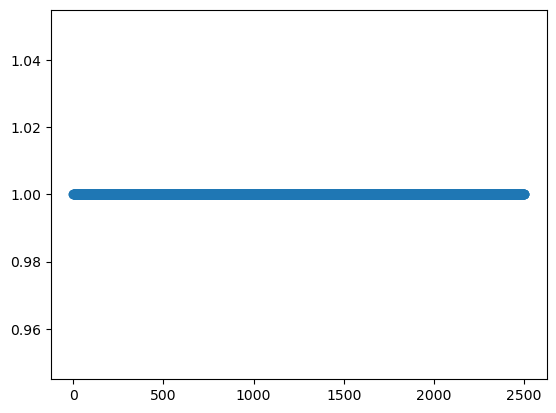

PyObject <matplotlib.collections.PathCollection object at 0x7f3564ce1940>

In [11]:
scatter([i for i in 1:length(microEstados.frio)],microEstados.frio)